## Vanilla Autoencoder - 21BAI1007

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
import keras
from keras import layers

encoding_dim = 32
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation = 'relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
encoder=keras.Model(input_img, encoded)

encoded_input = keras.Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]

decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 14ms/step - loss: 0.2738 - val_loss: 0.1894
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1710 - val_loss: 0.1536
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1448 - val_loss: 0.1347
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1298 - val_loss: 0.1227
Epoch 5/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1197 - val_loss: 0.1144
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1125 - val_loss: 0.1082
Epoch 7/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1071 - val_loss: 0.1036
Epoch 8/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1031 - val_loss: 0.1002
Epoch 9/50
235/235 [==============================] - 6s 24ms/step - loss: 0.1001 - val_loss: 0.0975
Epoch 10/50
235/235 [==============================] - 4s 17ms/step - loss: 0.0978 - val_lo

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


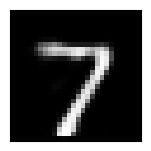

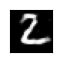

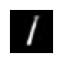

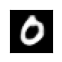

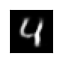

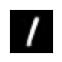

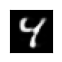

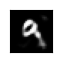

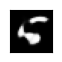

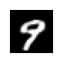

In [ ]:
import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(20, 4))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.show()